In [ ]:
 # Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from datetime import datetime

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [3]:
## Generate Cities List# Dependencies and Setup

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)



615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#create url for query with imperial units and city at the end
#url from https://openweathermap.org/appid
url = "https://api.openweathermap.org/data/2.5/weather?q="
unit = "imperial"


# Lists for results
lat = []
lon = []
foundCities = []
temp = []
humidity = []
cloudiness = []
windSpeed = []
date = []
country = []

for city in cities:
    query_url = f"{url}{city}&appid={weather_api_key}&units={unit}"
    response = requests.get(query_url).json()
    try:
        
        lat.append(response["coord"]["lat"])
        lon.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        windSpeed.append(response["wind"]["speed"])
        date.append(response["dt"])
        country.append(response["sys"]["country"])
        foundCities.append(city)
        print(f"City processed: {city}")
    except:
        print(f"City NOT found: {city}")
    time.sleep(10)
    

City processed: severo-kurilsk
City processed: atuona
City NOT found: amderma
City processed: quatre cocos
City processed: cayenne
City processed: maneadero
City processed: castro
City NOT found: belushya guba
City processed: acacoyagua
City processed: hobart
City processed: pimentel
City NOT found: taolanaro
City processed: aykhal
City NOT found: barentsburg
City processed: mayo
City processed: busselton
City processed: jamestown
City processed: khatanga
City processed: cape town
City processed: chuy
City processed: butaritari
City processed: port elizabeth
City processed: ponta delgada
City processed: hilo
City processed: qaanaaq
City processed: ushuaia
City processed: sitka
City processed: sao filipe
City processed: ribeira grande
City processed: torbay
City processed: port lincoln
City processed: arraial do cabo
City processed: astana
City processed: ust-kulom
City processed: rosaryville
City processed: new norfolk
City processed: provideniya
City processed: esperance
City processe

City processed: flinders
City processed: hendaye
City processed: atbasar
City processed: kavaratti
City processed: bose
City processed: pendra
City processed: karratha
City processed: ugoofaaru
City NOT found: mentok
City processed: semikarakorsk
City processed: tema
City processed: shambu
City processed: petropavlovsk-kamchatskiy
City processed: tazmalt
City processed: saint-georges
City processed: yulara
City processed: katsuura
City processed: mindelo
City processed: merauke
City processed: asfi
City processed: lasa
City processed: yerbogachen
City processed: itoman
City processed: flagstaff
City processed: husavik
City processed: beisfjord
City processed: valparaiso
City processed: port augusta
City processed: bathsheba
City processed: kamenka
City processed: broome
City processed: carutapera
City processed: moose jaw
City processed: montrose
City processed: pareora
City NOT found: tsihombe
City processed: kabo
City processed: mutoko
City processed: lincoln
City NOT found: dzhusaly

In [ ]:
Weather_DF = pd.DataFrame({"City": foundCities,
                           "Country": country,
                           "Temperature": temp,
                           "Humidity": humidity,
                           "Cloudiness": cloudiness,
                           "Windspeed":windSpeed,
                           "Latitude": lat,
                           "Longitude": lon,
                           "Date": date
                          })
Weather_DF

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_dataframe = Weather_DF[(Weather_DF['Humidity'] >100)]
clean_city_dataframe

In [3]:
# Extract relevant fields from the data frame
Weather_DF = pd.read_csv("weather_data.csv")
City_Data = Weather_DF[["City","Country", "Latitude", "Temperature", "Humidity", "Cloudiness", "Windspeed", "Date"]]

# Export the City_Data into a csv
# Windows path
# City_Data.to_csv('City_Data.csv', index = False)
# windows path
#City_Data.to_csv(r'/Users/md/Desktop/python-api-challenge/output_data/City_Data.csv', index = False)
City_Data.head()


,City,Country,Latitude,Temperature,Humidity,Cloudiness,Windspeed,Date
0,severo-kurilsk,RU,50.6789,46.63,77,59,14.63,1635209454
1,atuona,PF,-9.8000,78.10,72,25,17.11,1635209734
2,quatre cocos,MU,-20.2078,73.51,78,36,14.81,1635209755
3,cayenne,GF,4.9333,78.10,89,75,3.00,1635209765
4,maneadero,MX,31.7167,64.09,79,100,1.99,1635209775


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

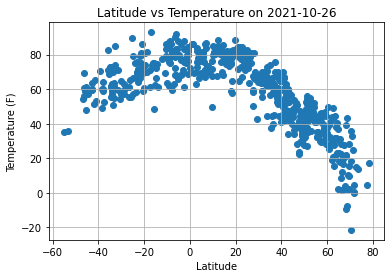

In [5]:

#format the max date in the dataset as "runDate" for graph titles
endRunDate = City_Data["Date"].max()
runDate = datetime.utcfromtimestamp(endRunDate).strftime('%Y-%m-%d')

#set data to plot
x = City_Data["Latitude"]
y = City_Data["Temperature"]
plt.scatter(x,y)
#add gridlines
plt.grid()
#add titles and axis labels
plt.title(f"Latitude vs Temperature on {runDate}")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")
#export as png
plt.savefig(f'../output_data/Latitude vs Temperature on {runDate}.png')
#display plot!
plt.show()

## Latitude vs. Humidity Plot

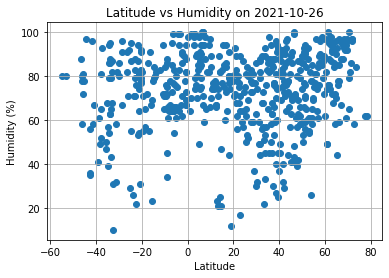

In [6]:
#set data to plot; retain Latitude from previous plot as "x"
h = City_Data["Humidity"]
plt.scatter(x,h)
plt.title(f"Latitude vs Humidity on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig(f'../output_data/Latitude vs Humidity on {runDate}.png')
plt.show()

## Latitude vs. Cloudiness Plot

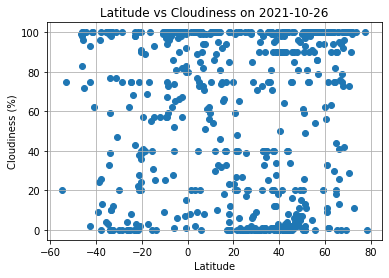

In [7]:
c = City_Data["Cloudiness"]
plt.scatter(x,c)
plt.title(f"Latitude vs Cloudiness on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig(f'../output_data/Latitude vs Cloudiness on {runDate}.png')
plt.show()

## Latitude vs. Wind Speed Plot

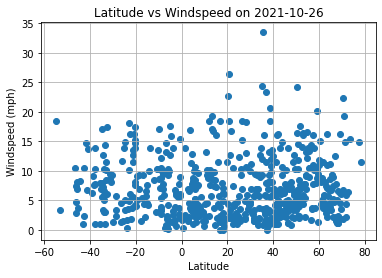

In [8]:
ws = City_Data["Windspeed"]
plt.scatter(x,ws)
plt.title(f"Latitude vs Windspeed on {runDate}")
plt.grid()
plt.xlabel("Latitude")
plt.ylabel("Windspeed (mph)")
plt.savefig(f'../output_data/Latitude vs Windspeed on {runDate}.png')
plt.show()

## Linear Regression

In [9]:
# OPTIONAL: Create a function to create Linear Regression plots

#function to call is "linearRegression"
#variables are
# x_values: first set of data
# y_values: second set of data
# regEQplotX: where the linear regression equasion appears on the plot x line
# regEQplotY: where the linear regression equasion appears on the plot y line
# y_label: the y axis label of the plot (x label is always Latitude)

def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(regEQplotX,regEQplotY),fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel(f'{y_label}')
    plt.grid()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [10]:
# Create Northern and Southern Hemisphere DataFrames
#pull loc above and below the equator; note any cities directly on the equator (i.e. latitude = 0) are excluded
Northern_DF = Weather_DF.loc[Weather_DF["Latitude"] > 0]
Southern_DF = Weather_DF.loc[Weather_DF["Latitude"] < 0]

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-square is 0.6730712334929925
y = 0.54x + 81.47


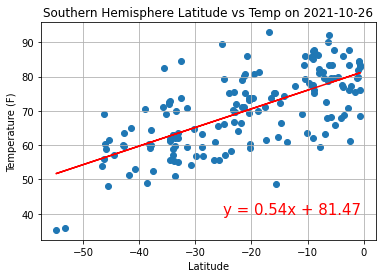

In [11]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Temperature"]
regEQplotX = -25
regEQplotY = 40
y_label = "Temperature (F)"
plt.title(f'Southern Hemisphere Latitude vs Temp on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-square is -0.8839467167735442
y = -0.96x + 91.06


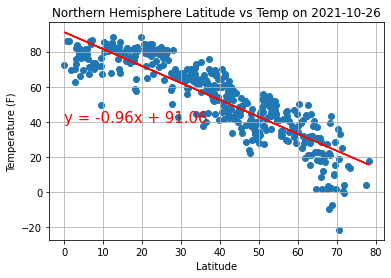

In [12]:
#set the data sets to compare
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Temperature"]
#tweak where the equation appears on the plot
regEQplotX = 0
regEQplotY = 40
#label the y axis
y_label = "Temperature (F)"
#give the title
plt.title(f'Northern Hemisphere Latitude vs Temp on {runDate}')
#run the function with all 5 variables
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
#save as a png to the neighboring output_data folder
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Temp on {runDate}.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.022602502728401405


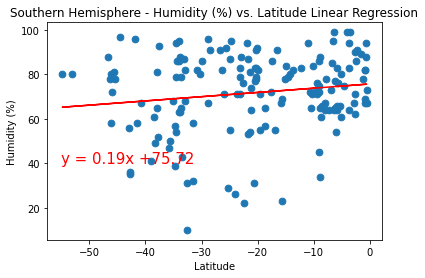

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = linregress(Southern_DF['Latitude'], Southern_DF['Humidity'])
regress_values = (Southern_DF['Latitude'] * slope + intercept)
plt.plot(Southern_DF['Latitude'], regress_values, 'r-')
plt.scatter(Southern_DF['Latitude'], Southern_DF['Humidity'], marker='o', s=45)
plt.title(f'Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
line_eq = "y = " + str(round(slope,2)) + "x +" + str(round(intercept,2))
plt.annotate(line_eq,(-55,40),fontsize=15,color="red")
plt.savefig("../output_data/southern_humid_vs_lat.png", bbox_inches="tight")
print(f"The r-squared is: {rvalue**2}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.06427869961215019
y = 0.13x + 53.29


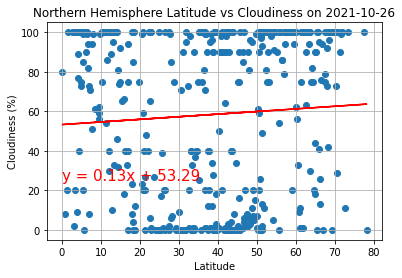

In [14]:

x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Cloudiness"]
regEQplotX = 0
regEQplotY = 25
y_label = "Cloudiness (%)"
plt.title(f'Northern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-square is 0.1583368280960344
y = 0.43x + 69.66


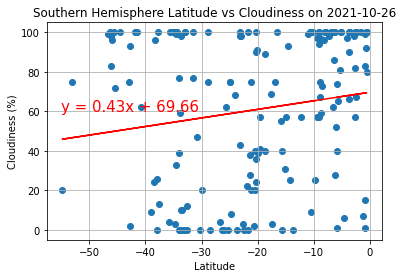

In [15]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Cloudiness"]
regEQplotX = -55
regEQplotY = 60
y_label = "Cloudiness (%)"
plt.title(f'Southern Hemisphere Latitude vs Cloudiness on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Cloudiness on {runDate}.png')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is 0.09574481285044138
y = 0.02x + 6.1


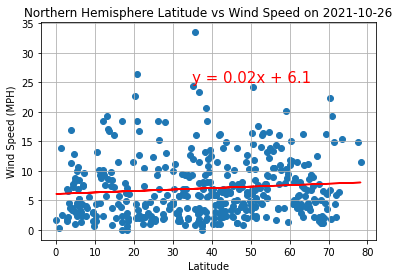

In [16]:
x_values = Northern_DF["Latitude"]
y_values = Northern_DF["Windspeed"]
regEQplotX = 35
regEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Northern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Northern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-square is -0.09479322597910758
y = -0.03x + 6.69


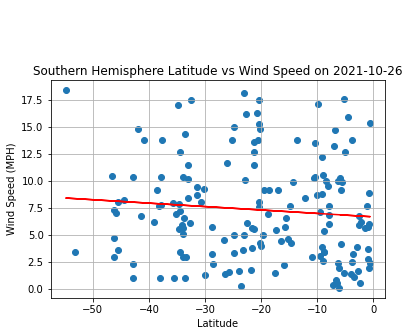

In [18]:
x_values = Southern_DF["Latitude"]
y_values = Southern_DF["Windspeed"]
regEQplotX = -50
RegEQplotY = 25
y_label = "Wind Speed (MPH)"
plt.title(f'Southern Hemisphere Latitude vs Wind Speed on {runDate}')
linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label)
plt.savefig(f'../output_data/Southern Hemisphere Latitude vs Wind Speed on {runDate}.png')
plt.show()